## Dependancies

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

####
- Part 1: Prepare the Data
- Part 2: Apply Dimensionality Reduction
- Part 3: Perform a Cluster Analysis with K-means
- Part 4: Make a Recommendation

## Part 1: Prepare the Data

### Import CSV

In [2]:
file_path = Path("resources/myopia.csv")
myopia_df = pd.read_csv(file_path)
myopia_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


### Data Exploration

In [3]:
myopia_df.describe()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
count,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000
mean,6.299353,0.801010,22.496780,3.578629,3.541453,15.376780,11.953074,2.796117,2.105178,1.490291,8.948220,26.017799,0.506472,0.498382,0.131068
std,0.712950,0.625918,0.680141,0.230394,0.154519,0.664183,7.968296,3.068191,3.056508,2.216207,5.719021,16.031715,0.500363,0.500402,0.337748
min,5.000000,-0.699000,19.900000,2.772000,2.960000,13.380000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,6.000000,0.456250,22.040001,3.424000,3.436000,14.930000,6.000000,0.000000,0.000000,0.000000,4.250000,15.000000,0.000000,0.000000,0.000000
50%,6.000000,0.729000,22.464999,3.585000,3.542000,15.360000,10.000000,2.000000,1.000000,1.000000,8.000000,23.000000,1.000000,0.000000,0.000000
75%,6.000000,1.034000,22.969999,3.730000,3.640000,15.840000,16.000000,4.000000,3.000000,2.000000,12.000000,34.000000,1.000000,1.000000,0.000000
max,9.000000,4.372000,24.559999,4.250000,4.112000,17.299999,45.000000,20.000000,30.000000,15.000000,31.000000,101.000000,1.000000,1.000000,1.000000


In [4]:
myopia_df.nunique()

AGE            5
SPHEQ        511
AL           254
ACD          206
LT           128
VCD          226
SPORTHR       40
READHR        16
COMPHR        18
STUDYHR       14
TVHR          28
DIOPTERHR     75
MOMMY          2
DADMY          2
MYOPIC         2
dtype: int64

In [5]:
myopia_df.shape

(618, 15)

In [6]:
myopia_df.dtypes

AGE            int64
SPHEQ        float64
AL           float64
ACD          float64
LT           float64
VCD          float64
SPORTHR        int64
READHR         int64
COMPHR         int64
STUDYHR        int64
TVHR           int64
DIOPTERHR      int64
MOMMY          int64
DADMY          int64
MYOPIC         int64
dtype: object

In [7]:
for column in myopia_df.columns:
    print(f"Column {column} has {myopia_df[column].isnull().sum()} null values")

Column AGE has 0 null values
Column SPHEQ has 0 null values
Column AL has 0 null values
Column ACD has 0 null values
Column LT has 0 null values
Column VCD has 0 null values
Column SPORTHR has 0 null values
Column READHR has 0 null values
Column COMPHR has 0 null values
Column STUDYHR has 0 null values
Column TVHR has 0 null values
Column DIOPTERHR has 0 null values
Column MOMMY has 0 null values
Column DADMY has 0 null values
Column MYOPIC has 0 null values


In [8]:
print(f"Duplicate entries: {myopia_df.duplicated().sum()}")

Duplicate entries: 0


### Drop "MYOPIC" column from dataset

In [9]:
labels = myopia_df["MYOPIC"]

In [10]:
myopic_column = myopia_df["MYOPIC"]
myopia_df.drop("MYOPIC", axis=1, inplace=True)

In [11]:
myopia_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


### Standardise dataset

In [12]:
myopia_scaled = StandardScaler().fit_transform(myopia_df)

In [13]:
myopia_scaled[0]

array([-0.42021911, -1.3639169 , -0.89286146,  0.48378402, -0.28144315,
       -1.0197916 ,  4.1506609 ,  1.69744958, -0.68931054, -0.67299591,
        0.18405806,  0.49830393,  0.98713773,  1.0032415 ])

## Part 2: Apply Dimensionality Reduction

### PCA

In [14]:
pca = PCA(n_components=0.99)

In [15]:
myopia_pca = pca.fit_transform(myopia_scaled)

In [16]:
myopia_pca[0]

array([ 0.53550271,  1.14500427, -1.38501894,  0.11600593, -3.22669052,
       -1.92845879, -1.95889156, -1.92299652,  0.02675285,  0.17814386,
       -1.3891124 , -0.57490916])

In [17]:
myopia_pca_df = pd.DataFrame(
    data = myopia_pca, 
    columns = ["PC1", "PC2", "PC3", "PC4", 
               "PC5", "PC6", "PC7", "PC8", 
               "PC9", "PC10", "PC 11", "PC 12"]
)
myopia_pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC 11,PC 12
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,-1.389112,-0.574909
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,-0.118153,0.527492
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,-0.287739,0.128478
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,0.652956,-0.672679
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,0.007640,0.995370


In [18]:
pca.explained_variance_ratio_

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566,
       0.04286506, 0.03839767])

### t-SNE 

In [19]:
tsne = TSNE(learning_rate=35)
tsne_features = tsne.fit_transform(myopia_pca_df)

/Users/missshola/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [20]:
tsne_features.shape

(618, 2)

In [21]:
myopia_pca_df['x'] = tsne_features[:,0]
myopia_pca_df['y'] = tsne_features[:,1]

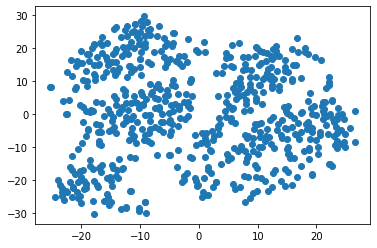

In [22]:
plt.scatter(myopia_pca_df['x'], myopia_pca_df['y'])
plt.show()

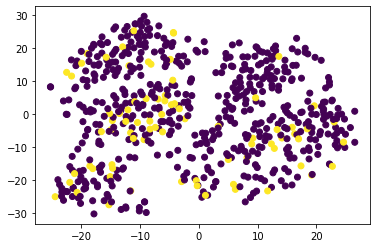

In [23]:
plt.scatter(myopia_pca_df['x'], myopia_pca_df['y'], c=labels)
plt.show()

#### Are there distinct clusters?

##### Exhbit 1:
- The clusters on data without "MYOPIA" column depict a fairly even distribution of clusters, with a slight distinction of more clusters formed around the lower end of the chart. Clusters seem to appear closer together with a higher X and Y value.

##### Exhbit 2:
- When "MYOPIA" is combined with Exhibit 1, it appears to depict a very similar distribution of clusters with a slight distinction of more clusters formed around the lower end of the chart and clusters closer to the higher X and Y value.

## Part 3: Perform a Cluster Analysis with K-means

### Create Elbow Curve

In [24]:
inertia = []
k = list(range(1, 11))

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(myopia_pca_df)
    inertia.append(km.inertia_)


elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,254347.587693
1,2,160059.925103
2,3,93452.428307
3,4,68795.812017
4,5,51700.660407


### Plot Elbow Curve

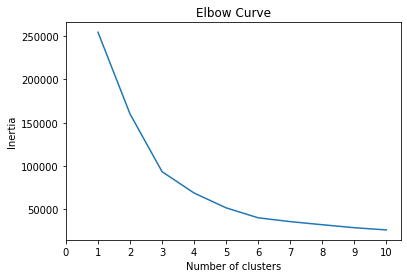

In [25]:
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

### Predicting clusters with k=3

In [26]:
model = KMeans(n_clusters=3, random_state=0)

model.fit(myopia_pca_df)

predictions = model.predict(myopia_pca_df)

# Add the predicted class column to the dataframe
myopia_pca_df["class"] = model.labels_
myopia_pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC 11,PC 12,x,y,class
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,-1.389112,-0.574909,19.174816,-18.572126,0
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,-0.118153,0.527492,-13.268915,1.177036,1
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,-0.287739,0.128478,6.840597,5.452026,0
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,0.652956,-0.672679,-8.157443,15.149737,1
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,0.007640,0.995370,11.249936,-8.113768,0


### Plot k=3 clusters

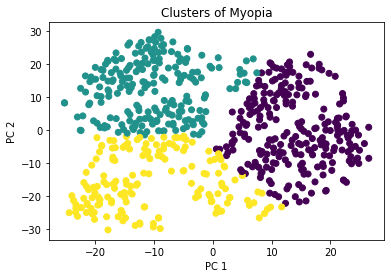

In [27]:
plt.scatter(x=myopia_pca_df['x'], y=myopia_pca_df['y'], c=myopia_pca_df['class'])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Clusters of Myopia')
plt.show()

### Predicting clusters with k=4

In [28]:
model = KMeans(n_clusters=4, random_state=0)

model.fit(myopia_pca_df)

predictions = model.predict(myopia_pca_df)

# Add the predicted class column to the dataframe
myopia_pca_df["class"] = model.labels_
myopia_pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC 11,PC 12,x,y,class
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,-1.389112,-0.574909,19.174816,-18.572126,3
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,-0.118153,0.527492,-13.268915,1.177036,1
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,-0.287739,0.128478,6.840597,5.452026,0
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,0.652956,-0.672679,-8.157443,15.149737,1
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,0.007640,0.995370,11.249936,-8.113768,3


### Plot k=4 clusters

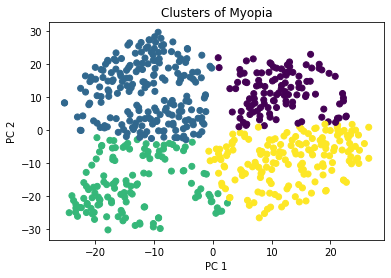

In [29]:
plt.scatter(x=myopia_pca_df['x'], y=myopia_pca_df['y'], c=myopia_pca_df['class'])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Clusters of Myopia')
plt.show()

### Predicting clusters with k=5

In [30]:
model = KMeans(n_clusters=5, random_state=0)

model.fit(myopia_pca_df)

predictions = model.predict(myopia_pca_df)

# Add the predicted class column to the dataframe
myopia_pca_df["class"] = model.labels_
myopia_pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC 11,PC 12,x,y,class
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,-1.389112,-0.574909,19.174816,-18.572126,2
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,-0.118153,0.527492,-13.268915,1.177036,1
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,-0.287739,0.128478,6.840597,5.452026,4
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,0.652956,-0.672679,-8.157443,15.149737,3
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,0.007640,0.995370,11.249936,-8.113768,2


### Plot k=5 clusters

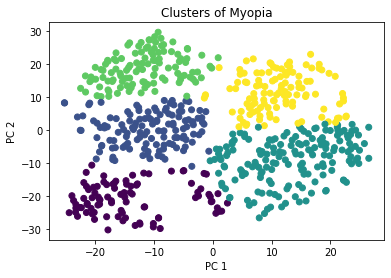

In [31]:
plt.scatter(x=myopia_pca_df['x'], y=myopia_pca_df['y'], c=myopia_pca_df['class'])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Clusters of Myopia')
plt.show()

## Part 4: Make a Recommendation

### Elbow Curve Analysis

- This method helps us determine the optimal number of clusters to use for k-means cluster analysis. 
- As we can see, the curve indicates an optimal number of 3 clusters. 

### Cluster Analysis

#### Findings based on elbow curve and k-means cluster analysis
- I would recommend splitting into 3 groups of patients since we can see this cluster perform best in comparison to cluster 4 and 5. 
- Further methods of testing could be used to verify the test group amount. 